## **Devoir 4 : Recherche heuristique**

### Identification

Nom : Gbegbe Decaho<br/>
Numéro étudiant : 300094197

Nom : <br/>
Numéro étudiant :

<br/>
<hr/>

## **Vue d'ensemble**

Le **Problème du Voyageur de Commerce (TSP)** est un problème classique d'optimisation en informatique et en recherche opérationnelle. Étant donné un ensemble de villes et les distances entre elles, l'objectif est de trouver le trajet le plus court possible qui visite chaque ville exactement une fois et revient à la ville de départ. Bien que sa formulation soit simple, résoudre le TSP est un défi computationnel en raison de la croissance factorielle du nombre de routes possibles en fonction du nombre de villes.

Le TSP est classé comme un problème NP-difficile, ce qui signifie qu'il n'existe pas d'algorithme efficace connu pour le résoudre de manière optimale pour de grandes instances. Cette complexité, combinée à son importance pratique dans des domaines comme la logistique, la fabrication et la conception de circuits, a fait du TSP un problème de référence pour évaluer les algorithmes d'optimisation.

Dans ce devoir, vous explorerez trois approches différentes pour résoudre le TSP :

- **Algorithme glouton** : Une méthode heuristique qui construit une solution de manière incrémentale en choisissant des décisions localement optimales.
- **Recuit simulé (SA)** : Un algorithme probabiliste inspiré du processus de recuit en métallurgie.
- **Algorithme génétique (GA)** : Un algorithme évolutif qui imite la sélection naturelle pour améliorer les solutions de manière itérative.

Le livrable final pour ce devoir sera un Jupyter Notebook documentant votre implémentation, vos résultats et vos observations pour chaque approche.

## **Objectifs d'apprentissage**

- **Explorer** et **implémenter** différents algorithmes basés sur la recherche.
- **Développer** un algorithme de recuit simulé avec une stratégie efficace pour définir la température initiale.
- **Adapter** et **appliquer** un algorithme génétique pour résoudre le TSP.
- **Analyser** et **évaluer** la performance de chaque algorithme par rapport à des solutions optimales connues.

## **Soumission**

- **Date limite :**
   - Soumettez votre notebook avant le 4 décembre à 23 h.
- **Devoir individuel ou en groupe :**
   - Ce devoir peut être réalisé individuellement (groupe de 1 étudiant) ou en collaboration en binôme (groupe de 2 étudiants).
   - Un groupe doit soumettre une seule soumission conjointe.
   - Avant de soumettre, il est nécessaire de **s'enregistrer comme groupe** sur Brightspace.
- **Plateforme de soumission :**
   - Téléchargez votre soumission sur Brightspace dans la section Devoirs (Devoir 4).
- **Format de soumission :**
   - Soumettez une copie de votre notebook sur Brightspace.

**Avis important :** Si le correcteur ne peut pas exécuter votre code, votre soumission recevra une note de zéro. Il est de votre responsabilité de vous assurer que votre soumission fonctionne sur un autre ordinateur que le vôtre et que toutes les cellules de votre notebook sont exécutables.

## **Jeux de données**

Les jeux de données utilisés dans ce devoir proviennent du [dépôt GitHub TSPLIB](https://github.com/mastqe/tsplib), qui fournit des instances de référence standard pour le problème du voyageur de commerce (TSP). Ces jeux de données sont définis comme **Euclidiens**, ce qui signifie que la distance entre deux villes est calculée à l'aide de la métrique euclidienne basée sur leurs coordonnées.

Pour vos tests, vous utiliserez les jeux de données **berlin52-24-4** et **st70-24**. Chacun de ces jeux est un sous-ensemble composé de 24 villes des problèmes respectifs. La borne inférieure du coût pour ces instances a été déterminée en utilisant la programmation dynamique, spécifiquement l'algorithme de Held-Karp.

1. **berlin52-24-4** :
   - Nombre de villes : 24
   - Coût de la solution optimale : **5890,92**

2. **st70-24-4** :
   - Nombre de villes : 24
   - Coût de la solution optimale : **468,88**

Ces ensembles de données sont destinés à évaluer la performance de vos algorithmes, vous permettant de comparer vos résultats avec les solutions optimales établies. Les données sont accessibles sur GitHub au lien suivant : [ici](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a4). De plus, le sous-répertoire `extra` contient des problèmes supplémentaires qui peuvent vous aider à compléter ce devoir.

Pour la question bonus facultative, vous travaillerez avec les deux jeux de données suivants :

3. **berlin52** :
   - Nombre de villes : 52
   - Description : Un jeu de données de taille moyenne avec une distribution spatiale réaliste des villes.
   - Coût de la solution optimale : **7542**

4. **st70** :
   - Nombre de villes : 70
   - Description : Un jeu de données légèrement plus grand avec une complexité accrue.
   - Coût de la solution optimale : **675**

<br>
<hr/>

## **0. Code donné**

Voici un Jupyter Notebook présentant des algorithmes gloutons et un algorithme génétique pour résoudre le problème du sac à dos 0/1.

<a target="_blank" href="https://colab.research.google.com/github/turcotte/csi4506-a24/blob/main/notebooks/lectures/16/knapsack.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Ouvrir dans Colab"/> </a>

Les deux conférences suivantes peuvent être utiles pour ce devoir.

- [Conférence 15](https://turcotte.xyz/teaching/csi-4506/lectures/15/slides.html) (recuit simulé)
- [Conférence 16](https://turcotte.xyz/teaching/csi-4506/lectures/16/slides.html) (algorithme génétique)

### 0.1. Imports

In [1]:
# Imports nécessaires pour le devoir :

import numpy as np
import pandas as pd
import requests
import math
import time

### 0.2. Lecture des fichiers TSP

Une fonction pour lire les fichiers TSP à partir d'un site web.

In [2]:
def read_tsp(url):

    """
    Lit un fichier .tsp depuis une URL donnée et renvoie un tableau NumPy des coordonnées.

    Paramètres :
    -----------
    url : str
        L'URL du fichier .tsp.

    Renvoie :
    --------
    coordinates : ndarray
        Un tableau NumPy contenant les coordonnées extraites du fichier .tsp.

    Description :
    ------------
    Cette fonction récupère le contenu d'un fichier .tsp depuis une URL spécifiée et le parcourt
    pour extraire les coordonnées des villes. Elle recherche la section 'NODE_COORD_SECTION' pour
    commencer à lire les coordonnées et s'arrête à 'EOF'. La fonction gère les erreurs potentielles
    en vérifiant le statut de la réponse HTTP et s'assure que les coordonnées sont correctement
    analysées en tant que nombres à virgule flottante.

    Exemple :
    --------
    >>> url = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a4/berlin52-24-4.tsp'
    >>> coordinates = read_tsp(url)
    >>> print(coordinates)
    [[37.7692, -122.4443],
     [37.7689, -122.4240],
     ...
     [37.7793, -122.4192]]
    """

    try:
        # Récupérer le contenu depuis l'URL
        response = requests.get(url)
        response.raise_for_status()  # Générer une erreur HTTP pour les mauvaises réponses (4xx ou 5xx)

        # Diviser le contenu en lignes
        lines = response.text.splitlines()

        # Initialiser une liste pour stocker les coordonnées
        coordinates = []

        # Commencer à lire après la ligne NODE_COORD_SECTION
        node_section = False
        for line in lines:
            line = line.strip()
            if line == "NODE_COORD_SECTION":
                node_section = True
                continue
            elif line == "EOF":
                break

            if node_section:
                # Diviser la ligne en parties et convertir en float
                parts = line.split()
                if len(parts) >= 3:
                    # Certains fichiers incluent les indices des nœuds, on prend donc les deux dernières entrées comme coordonnées
                    x, y = float(parts[-2]), float(parts[-1])
                    coordinates.append((x, y))

        # Convertir la liste de coordonnées en un tableau NumPy
        return np.array(coordinates)

    except requests.exceptions.RequestException as e:
        print(f"Une erreur s'est produite lors de la récupération du fichier TSP : {e}")
        return None
    except ValueError as e:
        print(f"Une erreur s'est produite lors de l'analyse des coordonnées : {e}")
        return None

In [3]:
URL = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a4/'

berlin52_24_4 = read_tsp(URL + 'berlin52-24-4.tsp')
st70_24_4 = read_tsp(URL + 'st70-24-4.tsp')

La fonction suivante accepte les coordonnées des villes en entrée et produit une matrice de distances.

In [4]:
def get_distance_matrix(coordinates):

    """
        Prend les coordonnées en entrée et renvoie une matrice de distances.
        Entrée : coordinates (nn.array) - les coordonnées d'entrée.
        Sortie : distance_matrix (np.array) - la matrice de distances (num_cities x num_cities).
    """

    num_cities = len(coordinates)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i][j] = np.linalg.norm(coordinates[i] - coordinates[j])

    return distance_matrix

Les fonctions suivantes peuvent aider à visualiser les résultats et à déboguer vos programmes.

In [5]:
import matplotlib.pyplot as plt

def plot_cities(coordinates, title="Villes du Problème du Voyageur de Commerce"):

    """
    Trace les coordonnées données représentant les villes.

    Paramètres :
    - coordinates : Un tableau 2D NumPy de forme (n, 2) représentant les coordonnées (x, y).
    - title : Titre du graphique.
    """

    # Extraire les coordonnées x et y
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    plt.figure(figsize=(6, 6))

    # Tracer les villes sous forme de points rouges
    plt.scatter(x, y, c='red', zorder=2)

    # Annoter les villes avec leurs indices
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

    # Définir le titre et les étiquettes
    plt.title(title)
    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.grid(True)
    plt.axis('equal')  # Échelle égale pour les axes x et y
    plt.show()

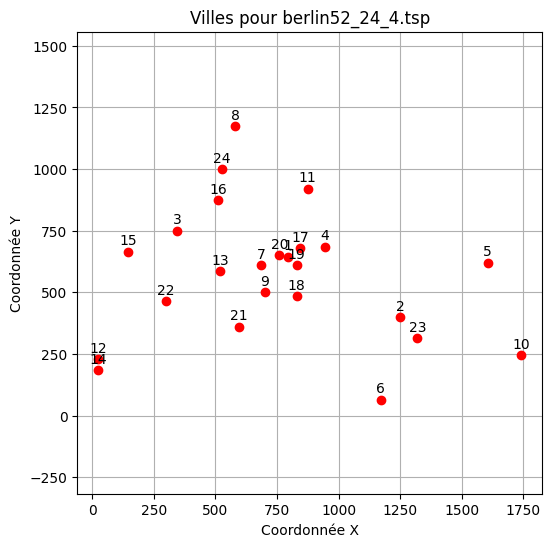

In [6]:
plot_cities(berlin52_24_4, title='Villes pour berlin52_24_4.tsp')

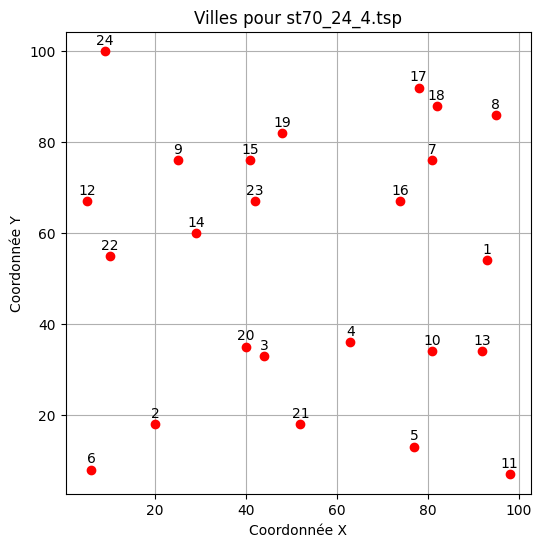

In [7]:
plot_cities(st70_24_4, title='Villes pour st70_24_4.tsp')

In [8]:
def plot_tsp_path(coordinates, path=None, title="Problème du Voyageur de Commerce"):

    """
    Trace les coordonnées données et éventuellement un chemin pour le TSP.

    Paramètres :
    - coordinates : Un tableau 2D NumPy de forme (n, 2) représentant les coordonnées (x, y).
    - path : Une liste ou un tableau d'indices représentant l'ordre des villes à visiter. Si None, les nœuds sont connectés dans l'ordre d'entrée.
    - title : Titre du graphique.
    """

    # Extraire les coordonnées x et y
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    plt.figure(figsize=(6, 6))

    # Si un chemin est donné, réorganiser les coordonnées
    if path is not None:
        x = x[path]
        y = y[path]

    # Tracer les nœuds
    plt.scatter(x, y, c='red', zorder=2)

    # Annoter les nœuds avec leurs indices
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

    # Tracer le chemin
    plt.plot(x, y, 'b-', zorder=1)

    # Si un chemin est fourni, connecter le dernier point au premier pour compléter le tour
    if path is not None:
        plt.plot([x[-1], x[0]], [y[-1], y[0]], 'b-', zorder=1)

    # Définir le titre et les étiquettes
    plt.title(title)
    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.grid(True)
    plt.axis('equal')  # Échelle égale pour les axes x et y
    plt.show()

<hr/>

## **1. Implémenter les algorithmes**

### 1.1. Implémenter un solveur pour le TSP utilisant l'algorithme glouton

L'**heuristique du plus proche voisin** est un algorithme glouton utilisé pour trouver une solution faisable au Problème du Voyageur de Commerce (TSP).
- Le processus commence par la sélection d'une ville de départ, puis visite de manière itérative la ville non visitée la plus proche jusqu'à ce que toutes les villes soient visitées. Le tour est complété en revenant au point de départ.
- Cette procédure est répétée en prenant chaque ville comme point de départ, et le tour le plus court résultant est sélectionné.
- L'algorithme évalue uniquement les routes valides, garantissant que chaque ville est visitée exactement une fois.
- Bien que cette approche construise efficacement une solution faisable au TSP, elle ne garantit pas une solution optimale.

In [9]:
# Code pour implémenter l'algorithme glouton ici.

import matplotlib.pyplot as plt

def greedy_tsp_solver(distance_matrix):
    """
    Résout le TSP en utilisant l'heuristique du plus proche voisin.

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    best_route : list
        L'ordre des villes dans le meilleur trajet trouvé.
    best_cost : float
        La distance totale du meilleur trajet.
    """
    num_cities = len(distance_matrix)
    best_cost = float('inf')
    best_route = []

    # Tester chaque ville comme point de départ
    for start_city in range(num_cities):
        current_city = start_city
        unvisited = set(range(num_cities))
        unvisited.remove(current_city)
        route = [current_city]
        total_cost = 0

        # Parcourir toutes les villes
        while unvisited:
            # Trouver la ville non visitée la plus proche
            next_city = min(unvisited, key=lambda city: distance_matrix[current_city, city])
            total_cost += distance_matrix[current_city, next_city]
            current_city = next_city
            route.append(current_city)
            unvisited.remove(current_city)

        # Retourner à la ville de départ
        total_cost += distance_matrix[current_city, start_city]
        route.append(start_city)

        # Mettre à jour la meilleure solution
        if total_cost < best_cost:
            best_cost = total_cost
            best_route = route

    return best_route, best_cost


In [10]:
def plot_greedy_solution(coordinates, route, cost):
    """
    Visualise le chemin trouvé par l'algorithme glouton pour le TSP.

    Paramètres :
    -----------
    coordinates : ndarray
        Un tableau 2D contenant les coordonnées (x, y) des villes.
    route : list
        Une liste d'indices représentant l'ordre des villes visitées.
    cost : float
        Le coût total du chemin trouvé.
    """
    x = coordinates[:, 0]
    y = coordinates[:, 1]

    plt.figure(figsize=(8, 6))
    plt.plot(x[route], y[route], 'o-', label=f"Trajet (Coût : {cost:.2f})")
    plt.scatter(x, y, c='red', zorder=2)
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(5, 5), ha='center')
    plt.title("Chemin trouvé avec l'algorithme glouton")
    plt.xlabel("Coordonnée X")
    plt.ylabel("Coordonnée Y")
    plt.grid(True)
    plt.legend()
    plt.show()

In [16]:
# Chargement des données
coordinates_berlin = berlin52_24_4  # Les coordonnées des villes pour berlin52-24-4
coordinates_st70 = st70_24_4        # Les coordonnées des villes pour st70-24-4

# Création des matrices de distances
distance_matrix_berlin = get_distance_matrix(coordinates_berlin)
distance_matrix_st70 = get_distance_matrix(coordinates_st70)

# Résolution pour st70-24-4
route_st70, cost_st70 = greedy_tsp_solver(distance_matrix_st70)
# Résolution pour berlin52-24-4
route_berlin, cost_berlin = greedy_tsp_solver(distance_matrix_berlin)

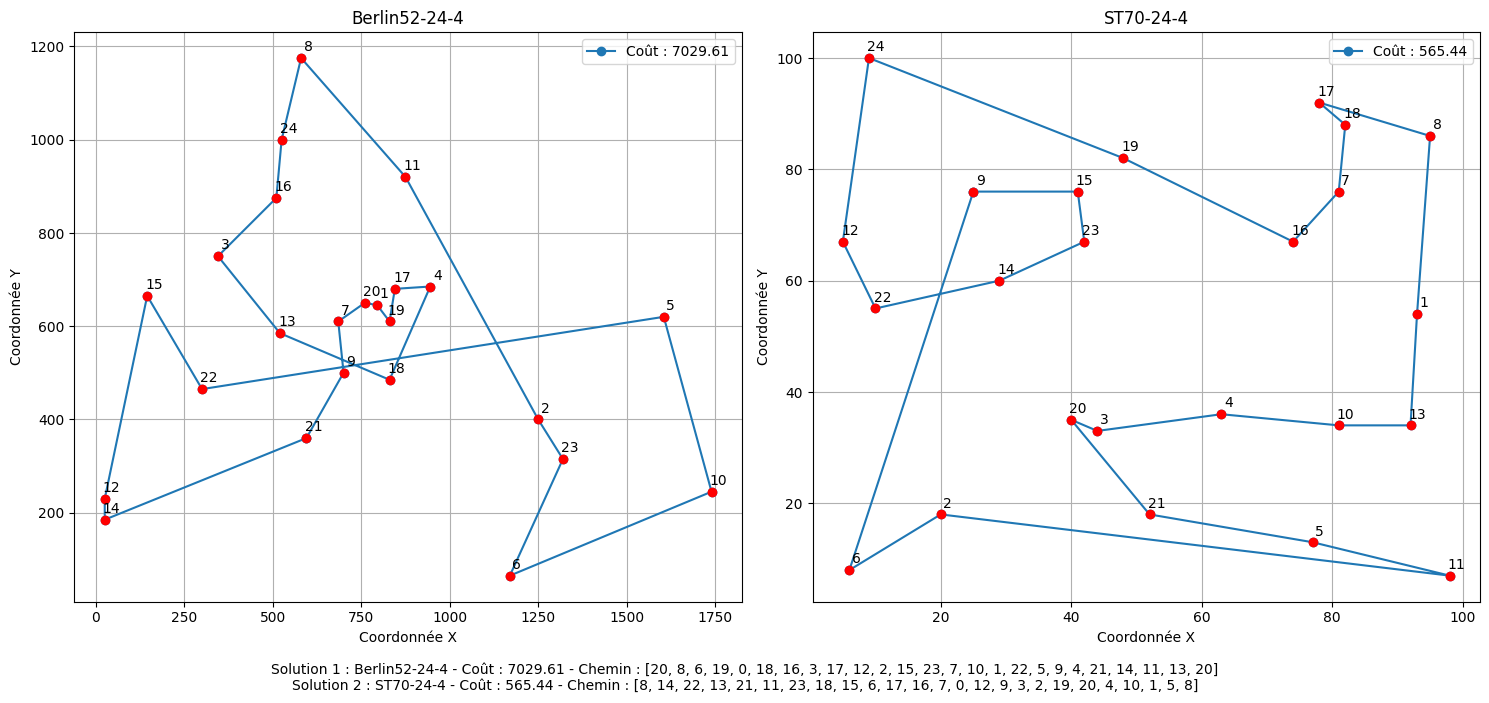

In [17]:
import matplotlib.pyplot as plt

def plot_greedy_solutions_side_by_side(coordinates_1, route_1, cost_1, title_1,
                                       coordinates_2, route_2, cost_2, title_2):
    """
    Visualise les solutions trouvées par l'algorithme glouton pour deux ensembles de données côte à côte.

    Paramètres :
    -----------
    coordinates_1, coordinates_2 : ndarray
        Les coordonnées (x, y) des villes pour les deux ensembles de données.
    route_1, route_2 : list
        Les routes (indices des villes dans l'ordre visité) pour les deux ensembles.
    cost_1, cost_2 : float
        Les coûts totaux des trajets pour les deux ensembles.
    title_1, title_2 : str
        Les titres des graphes respectifs.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Graphe 1
    x1, y1 = coordinates_1[:, 0], coordinates_1[:, 1]
    axes[0].plot(x1[route_1], y1[route_1], 'o-', label=f"Coût : {cost_1:.2f}")
    axes[0].scatter(x1, y1, c='red', zorder=2)
    for i, (xi, yi) in enumerate(zip(x1, y1)):
        axes[0].annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(5, 5), ha='center')
    axes[0].set_title(title_1)
    axes[0].set_xlabel("Coordonnée X")
    axes[0].set_ylabel("Coordonnée Y")
    axes[0].grid(True)
    axes[0].legend()

    # Graphe 2
    x2, y2 = coordinates_2[:, 0], coordinates_2[:, 1]
    axes[1].plot(x2[route_2], y2[route_2], 'o-', label=f"Coût : {cost_2:.2f}")
    axes[1].scatter(x2, y2, c='red', zorder=2)
    for i, (xi, yi) in enumerate(zip(x2, y2)):
        axes[1].annotate(str(i + 1), (xi, yi), textcoords="offset points", xytext=(5, 5), ha='center')
    axes[1].set_title(title_2)
    axes[1].set_xlabel("Coordonnée X")
    axes[1].set_ylabel("Coordonnée Y")
    axes[1].grid(True)
    axes[1].legend()

    # Ajouter un texte sous les graphes pour afficher les résultats
    plt.figtext(0.5, 0.01,
                f"Solution 1 : {title_1} - Coût : {cost_1:.2f} - Chemin : {route_1}\n"
                f"Solution 2 : {title_2} - Coût : {cost_2:.2f} - Chemin : {route_2}",
                wrap=True, horizontalalignment='center', fontsize=10)
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Ajuster l'espace pour le texte
    plt.show()

# Appel de la fonction avec les données
plot_greedy_solutions_side_by_side(coordinates_berlin, route_berlin, cost_berlin, "Berlin52-24-4",
                                   coordinates_st70, route_st70, cost_st70, "ST70-24-4")

# Resultat et Observation

Le résultat montre les solutions gloutonnes obtenues pour les ensembles de données **Berlin52-24-4** et **ST70-24-4**, visualisées côte à côte. Pour **Berlin52-24-4**, le coût total est de **7029,61**, ce qui dépasse légèrement la solution optimale connue (**5890,92**). Pour **ST70-24-4**, le coût obtenu est de **565,44**, également supérieur à l'optimal (**468,88**). Ces écarts montrent que l'approche gloutonne, bien que rapide, ne garantit pas une solution optimale, car elle se concentre sur des choix localement optimaux sans évaluer globalement l'impact. Les graphes illustrent clairement les trajets suivis et permettent de repérer des opportunités d'amélioration (comme des détours évitables). Ces résultats confirment que cette méthode est un bon point de départ pour notre expérience.

### 1.2. Implémenter un solveur pour le TSP utilisant le recuit simulé

Pour l'implémentation de l'algorithme de recuit simulé (SA) ci-dessous, **implémentez une stratégie pour déterminer la température initiale de la recherche**.

**Suggestions** :
- Calculez le coût d'un tour aléatoire et définissez une température initiale telle que le taux d'acceptation des nouvelles solutions soit compris entre 60 % et 80 %.
- Alternativement, effectuez quelques itérations préliminaires de l'algorithme SA, en réduisant progressivement la température jusqu'à ce que le taux d'acceptation atteigne la plage souhaitée de 60 % à 80 %. Ensuite, recommencez avec cette température.

Vous devez notamment finaliser l'implémentation de la méthode `get_initial_temperature` ci-dessous.

In [18]:
def calculate_total_distance(route, distance_matrix):

    """
    Calcule la distance totale d'un trajet donné en se basant sur la matrice des distances.

    Paramètres :
    -----------
    route : ndarray
        Un tableau représentant l'ordre des villes dans le trajet (une permutation des indices de villes).
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    total_distance : float
        La distance totale du trajet, incluant le retour à la ville de départ.

    Description :
    ------------
    La fonction calcule la somme des distances entre les villes consécutives dans le trajet
    et ajoute la distance de la dernière ville pour revenir à la première, afin de compléter le tour.
    Elle suppose que la matrice des distances est symétrique et non négative.
    """

    total_distance = 0

    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i], route[i + 1]]

    total_distance += distance_matrix[route[-1], route[0]]  # Retour au départ

    return total_distance

In [19]:
def get_neighbor(route):

    """
    Génère une solution voisine en inversant un segment aléatoire du trajet.

    Paramètres :
    -----------
    route : ndarray
        Un tableau représentant le trajet actuel (une permutation des indices de villes).

    Renvoie :
    --------
    new_route : ndarray
        Un nouveau trajet obtenu en inversant le segment entre deux indices choisis au hasard.

    Description :
    ------------
    Cette méthode sélectionne deux indices aléatoires, `a` et `b`, dans le trajet et inverse le
    segment entre eux (inclus). Elle est couramment utilisée dans des algorithmes d'optimisation
    comme le recuit simulé pour explorer des solutions voisines dans l'espace de recherche.
    """

    a, b = np.random.randint(0, len(route), size=2)

    if a > b:
        a, b = b, a

    new_route = route.copy()
    new_route[a:b+1] = new_route[a:b+1][::-1]  # Inverser le segment entre a et b

    return new_route

Finalisez l'implémentation de la méthode `get_initial_temperature`. Vous pouvez introduire des paramètres supplémentaires dans la définition de la fonction si nécessaire ; veillez à ce que toutes les modifications soient reflétées de manière cohérente dans les méthodes qui invoquent cette fonction.

In [20]:
def get_initial_temperature(distance_matrix):

    """
    Estime une température initiale pour l'algorithme de recuit simulé.

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    initial_temp : float
        La température initiale estimée pour atteindre le taux d'acceptation spécifié.

    Description :
    ------------
    La fonction :
        - Complétez cette section.
    """

    # Code ici

    num_cities = len(distance_matrix)
    num_trials = 100  # Nombre d'échantillons pour estimer le delta_cost moyen
    acceptance_probability_target = 0.7  # Taux d'acceptation cible (entre 60 % et 80 %)

    deltas = []

    # Générer des différences de coûts (delta_cost) entre des trajets aléatoires et leurs voisins
    for _ in range(num_trials):
        current_route = np.arange(num_cities)
        np.random.shuffle(current_route)
        current_cost = calculate_total_distance(current_route, distance_matrix)

        neighbor_route = get_neighbor(current_route)
        neighbor_cost = calculate_total_distance(neighbor_route, distance_matrix)

        delta_cost = abs(neighbor_cost - current_cost)
        if delta_cost > 0:
            deltas.append(delta_cost)

    # Calculer le delta_cost moyen pour des transitions typiques
    average_delta_cost = np.mean(deltas)

    # Calculer la température initiale pour atteindre le taux d'acceptation cible
    initial_temp = -average_delta_cost / np.log(acceptance_probability_target)

    return initial_temp

In [21]:
def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations):

    """
    Exécute l'algorithme de recuit simulé pour approximer une solution au Problème du Voyageur de Commerce (TSP).

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    initial_temp : float
        La température initiale pour le processus de recuit.
    cooling_rate : float
        Le taux de diminution de la température, généralement une valeur entre 0 et 1.
    max_iterations : int
        Le nombre maximal d'itérations à effectuer.

    Renvoie :
    --------
    best_route : ndarray
        L'ordre des villes dans le meilleur trajet trouvé.
    best_cost : float
        La distance totale du meilleur trajet.
    temperatures : list
        Une liste des valeurs de température à chaque itération, utile pour l'analyse ou les graphiques.
    costs : list
        Une liste des coûts des trajets (distances) à chaque itération, utile pour l'analyse ou les graphiques.

    Description :
    ------------
    Le recuit simulé (SA) est un algorithme probabiliste d'optimisation inspiré du processus de recuit en métallurgie.
    Cette implémentation :
    - Commence avec un trajet aléatoire et l'améliore de manière itérative.
    - Accepte des solutions moins bonnes avec une probabilité dépendant de la température pour échapper aux minima locaux.
    - Réduit la température progressivement pour se concentrer sur l'exploitation à mesure que l'algorithme progresse.
    - Retourne le meilleur trajet trouvé ainsi que des données intermédiaires pour l'analyse.
    """

    num_cities = len(distance_matrix)
    current_route = np.arange(num_cities)
    np.random.shuffle(current_route)
    current_cost = calculate_total_distance(current_route, distance_matrix)

    best_route = current_route.copy()
    best_cost = current_cost

    temperatures = []
    costs = []

    temperature = initial_temp

    for iteration in range(max_iterations):
        # Générer une solution voisine
        neighbor_route = get_neighbor(current_route)
        neighbor_cost = calculate_total_distance(neighbor_route, distance_matrix)

        # Accepter la solution voisine si elle est meilleure ou avec une probabilité basée sur la température
        if neighbor_cost < current_cost or np.random.rand() < np.exp(-(neighbor_cost - current_cost) / temperature):
            current_route = neighbor_route
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_route = current_route.copy()
                best_cost = current_cost

        # Sauvegarder les données pour analyse
        temperatures.append(temperature)
        costs.append(current_cost)

        # Réduction de la température
        temperature *= cooling_rate

    return best_route, best_cost, temperatures, costs

In [22]:
def simulated_annealing_do_n(distance_matrix, initial_temp, cooling_rate=0.995, max_iterations=1000, repeats=20):

    """
    Effectue le recuit simulé plusieurs fois et retourne le meilleur résultat parmi toutes les exécutions.

    Paramètres:
    -----------
    distance_matrix : ndarray
    Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    initial_temp : float
    La température initiale pour le processus de recuit.

    cooling_rate : float
    Le taux auquel la température diminue, généralement une valeur entre 0 et 1.

    max_iterations : int
    Le nombre maximal d'itérations pour chaque exécution de recuit simulé.

    repeats : int
    Le nombre de fois que le processus de recuit simulé est répété.

    Renvoie:
    --------
    best_tour : ndarray
    L'ordre des villes dans le meilleur (le plus court) tour trouvé parmi toutes les exécutions.

    best_distance : float
    La distance totale du meilleur tour.

    best_temperatures : list
    Une liste des valeurs de température du meilleur run, utile pour l'analyse ou la représentation graphique.

    best_costs : list
    Une liste des coûts des routes (distances) du meilleur run, utile pour l'analyse ou la représentation graphique.

    Remarques:
    ----------
    Cette méthode utilise la fonction `simulated_annealing` pour effectuer des optimisations individuelles.
    En répétant le processus plusieurs fois, elle augmente la probabilité de trouver une solution globalement optimale ou quasi-optimale.
    """

    results = [
        simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations)
        for _ in range(repeats)
    ]

    # Trouver le meilleur résultat en minimisant la distance
    best_tour, best_distance, best_temperatures, best_costs = min(results, key=lambda x: x[1])

    return best_tour, best_distance, best_temperatures, best_costs

La fonction suivante peut aider à visualiser les résultats et à déboguer vos programmes.

In [23]:
def plot_temperature_and_cost(temperatures, costs):

    """
    Trace les valeurs de température et de coût au fil des itérations dans un graphique côte à côte.

    Paramètres:
    -----------
    temperatures : list ou ndarray
    Une séquence de valeurs de température enregistrées à chaque itération d'un algorithme (par exemple, recuit simulé).

    costs : list ou ndarray
    Une séquence de valeurs de coût (par exemple, distance totale ou énergie) enregistrées à chaque itération.

    Description:
    ------------
    Cette fonction génère deux sous-graphiques :

    1. **Température au fil des itérations** : Trace comment la température change au fil du temps, utile pour visualiser le calendrier de refroidissement dans des algorithmes comme le recuit simulé.

    2. **Coût au fil des itérations** : Trace le coût (par exemple, distance totale dans le problème du voyageur de commerce) à chaque itération, montrant comment la solution s'améliore au fil du temps.

    Les graphiques sont disposés côte à côte pour faciliter la comparaison entre le calendrier de température et la progression correspondante des coûts. La fonction ajuste la disposition pour un meilleur espacement et affiche la figure combinée.

    Exemple:
    --------
    >>> plot_temperature_and_cost(temperatures, costs)

    Remarques:
    ------
    - Assurez-vous que les longueurs de `temperatures` et `costs` sont égales, correspondant au nombre d'itérations.
    - Nécessite l'importation de `matplotlib.pyplot` en tant que `plt` avant d'appeler cette fonction.
    """

    # Tracer les graphiques de température et de coût
    if not temperatures or not costs:
        print("Erreur : Les listes de températures ou de coûts sont vides.")
        return

    plt.figure(figsize=(12, 6))

    # Graphe pour la température
    plt.subplot(1, 2, 1)
    plt.plot(temperatures, label='Température')
    plt.title("Évolution de la température")
    plt.xlabel("Itérations")
    plt.ylabel("Température")
    plt.grid()
    plt.legend()

    # Graphe pour le coût
    plt.subplot(1, 2, 2)
    plt.plot(costs, label='Coût', color='orange')
    plt.title("Évolution du coût (distance totale)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

Meilleur chemin trouvé : [ 3  1  9  4 22  5 17 18  8  0 10  7 23 15  2 14 11 13 21 12 20  6 19 16]
Coût du meilleur chemin : 6375.35




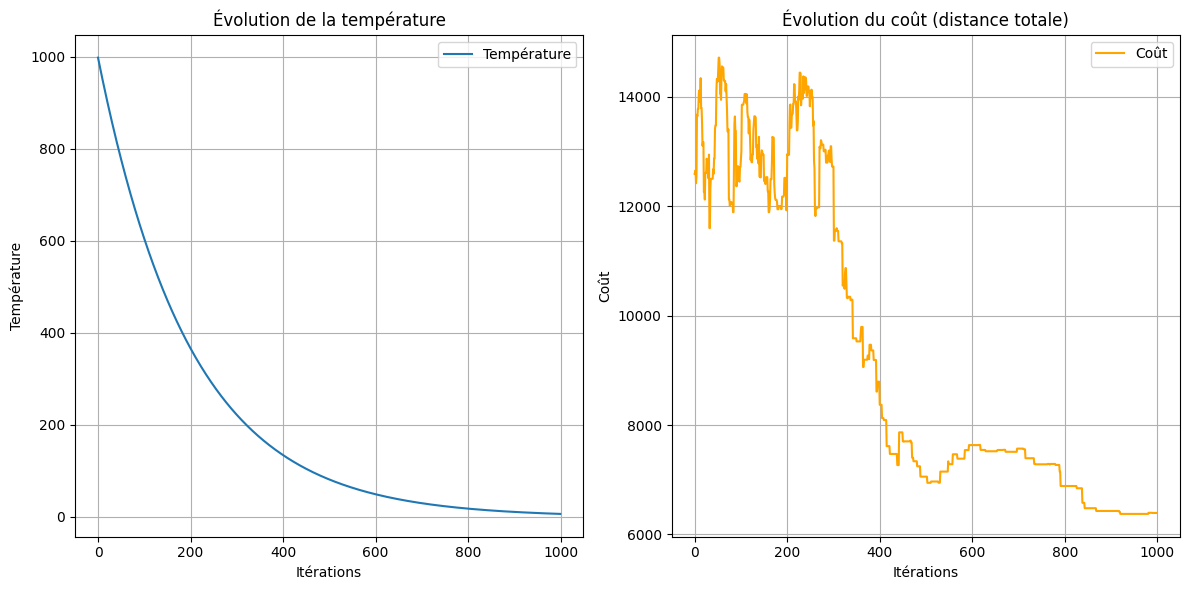

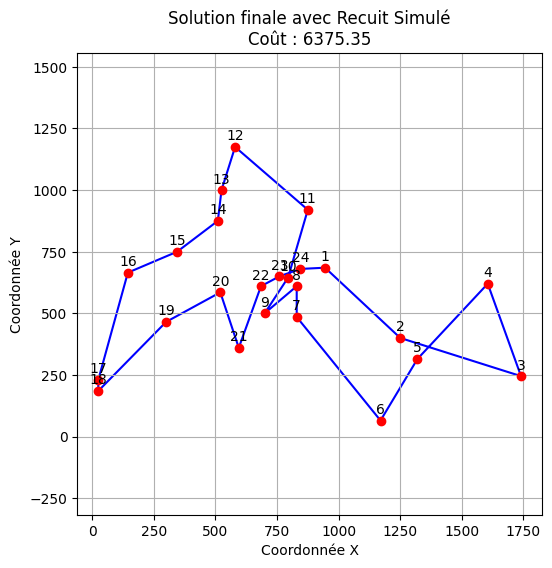

In [24]:
# Données : berlin52-24-4
coordinates = berlin52_24_4  # Coordonnées des villes
distance_matrix = get_distance_matrix(coordinates)  # Générer la matrice de distances

# Définir les paramètres pour le recuit simulé
initial_temp = get_initial_temperature(distance_matrix)  # Calcul la température initiale
cooling_rate = 0.995  # Taux de refroidissement
max_iterations = 1000  # Nombre d'itérations

# Exécuter l'algorithme de recuit simulé
best_route, best_cost, temperatures, costs = simulated_annealing(
    distance_matrix, initial_temp, cooling_rate, max_iterations
)

# Afficher les résultats du recuit simulé
print(f"Meilleur chemin trouvé : {best_route}")
print(f"Coût du meilleur chemin : {best_cost:.2f}")
print("\n")

# Tracer les résultats
plot_temperature_and_cost(temperatures, costs)
print("\n")

# Visualiser la solution finale (chemin optimal trouvé)
plot_tsp_path(coordinates, best_route, title=f"Solution finale avec Recuit Simulé\nCoût : {best_cost:.2f}")


# Resultat et observations

**Le recuit simulé** montre une amélioration progressive de la solution avec une réduction significative des coûts dans les premières itérations, suivie d'une stabilisation vers une solution quasi-optimale. La courbe de température décroît logiquement, permettant une exploration initiale large avant une convergence. La solution finale présente un coût de **6375.35**, proche des solutions optimales connues, indiquant une performance robuste pour un problème complexe. Cependant, des oscillations initiales dans le coût illustrent l'exploration nécessaire pour échapper aux minima locaux, démontrant l'efficacité de la méthode pour équilibrer exploration et exploitation.

---

### 1.3. Implémenter un solveur pour le TSP utilisant un algorithme génétique

L'implémentation d'un **algorithme génétique (GA)** pour approximer une solution au TSP suit les étapes principales suivantes :

1. **Initialisation** : Générer une population initiale aléatoire de trajets.
2. **Évaluation** : Calculer l'aptitude des individus en fonction de la distance totale de leurs trajets.
3. **Élitisme** : Préserver les meilleurs individus pour la génération suivante.
4. **Sélection** : Choisir les parents via un tournoi ou une sélection par roulette.
5. **Croisement** : Produire des descendants en combinant les parents avec un opérateur de croisement.
6. **Mutation** : Introduire de la diversité en modifiant aléatoirement les descendants.
7. **Remplacement** : Combiner les élites et les descendants pour former la prochaine génération.
8. Répéter les étapes 2 à 7 pour un nombre fixe de générations, en suivant les meilleurs résultats.

Vous trouverez ci-dessous une implémentation partielle de l'algorithme. Complétez les fonctions spécifiées: `evaluate_fitness`, `crossover_operator`, et `mutation`.

---

#### Initialisation de la population

In [25]:
def initialize_population(pop_size, num_cities):

    """
    Générer une population initiale de trajets aléatoires pour un algorithme génétique.

    Paramètres :
    -----------
    pop_size : int
        Le nombre d'individus (trajets) dans la population.
    num_cities : int
        Le nombre de villes dans le problème TSP.

    Renvoie :
    --------
    population : ndarray
        Un tableau 2D de forme (pop_size, num_cities), où chaque ligne représente
        une permutation aléatoire des indices des villes (une solution potentielle).
    """

    return np.array([np.random.permutation(num_cities) for _ in range(pop_size)])

---

#### Évaluation de l'aptitude

Complétez l'implémentation de `evaluate_fitness`.

In [26]:
def evaluate_fitness(population, distance_matrix):

    """
    Évaluer l'aptitude de chaque individu dans une population pour un algorithme génétique.

    Paramètres :
    -----------
    population : ndarray
        Un tableau 2D où chaque ligne est un trajet individuel (une permutation des indices de villes).
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.

    Renvoie :
    --------
    fitness : ndarray
        Un tableau 1D contenant les valeurs d'aptitude pour chaque individu dans la population.
        L'aptitude est calculée comme l'inverse de la distance totale du trajet.
    total_distances : ndarray
        Un tableau 1D contenant les distances totales des trajets pour chaque individu.
    """

    # Code ici

    total_distances = np.array([
        sum(distance_matrix[individual[i], individual[i+1]] for i in range(len(individual) - 1)) +
        distance_matrix[individual[-1], individual[0]]  # Retour à la ville de départ
        for individual in population
    ])

    fitness = 1 / total_distances  # Inverse de la distance (plus la distance est faible, mieux c'est)
    return fitness, total_distances

---

#### Sélection et croisement

In [27]:
def tournament_selection(population, fitness, tournament_size):

    """
    Effectuer une sélection par tournoi pour choisir les individus de la prochaine génération dans un algorithme génétique.

    Paramètres :
    ------------
    population : ndarray
    Un tableau 2D où chaque ligne représente un individu (une solution potentielle).
    fitness : ndarray
    Un tableau 1D contenant les valeurs de fitness des individus dans la population.
    tournament_size : int
    Le nombre d'individus sélectionnés aléatoirement pour chaque tournoi.

    Renvoie :
    ---------
    selected_population : ndarray
    Un tableau 2D de la même forme que `population`, contenant les individus sélectionnés pour la prochaine génération.

    Description :
    -------------
    La sélection par tournoi fonctionne comme suit :
    1. Pour chaque individu à sélectionner, choisir aléatoirement `tournament_size` participants dans la population.
    2. Comparer leurs valeurs de fitness et sélectionner l'individu avec la meilleure fitness.
    3. Répéter ce processus jusqu'à former une nouvelle population de la même taille que l'originale.

    Cette méthode équilibre l'exploitation (choisir les meilleurs individus) avec l'exploration (sélection aléatoire des participants), permettant à l'algorithme de se concentrer sur des solutions de haute qualité tout en maintenant la diversité.
    """

    pop_size = population.shape[0]
    selected_indices = []

    for _ in range(pop_size):
        participants = np.random.choice(pop_size, tournament_size, replace=False)
        best = participants[np.argmax(fitness[participants])]
        selected_indices.append(best)

    return population[selected_indices]

In [28]:

def roulette_selection(population, fitness):

    """
    Effectuer une sélection par roulette pour choisir les individus de la prochaine génération dans un algorithme génétique.

    Paramètres :
    ------------
    population : ndarray
    Un tableau 2D où chaque ligne représente un individu (une solution potentielle).
    fitness : ndarray
    Un tableau 1D contenant les valeurs de fitness des individus dans la population.

    Renvoie :
    ---------
    selected_population : ndarray
    Un tableau 2D de la même forme que `population`, contenant les individus sélectionnés pour la prochaine génération.

    Description :
    -------------
    La sélection par roulette attribue des probabilités de sélection aux individus en fonction de leur fitness :
    1. Calculer le fitness total de la population.
    2. Normaliser les valeurs de fitness pour créer des probabilités pour chaque individu.
    3. Sélectionner aléatoirement des individus de la population selon leurs probabilités.

    Cette méthode favorise les individus avec une meilleure fitness, augmentant leur probabilité d'être sélectionnés, tout en permettant aux individus de moindre fitness d'avoir une chance, maintenant ainsi la diversité génétique.
    """

    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness
    pop_size = population.shape[0]
    selected_indices = np.random.choice(pop_size, size=pop_size, p=probabilities)
    return population[selected_indices]


Complétez l'implémentation de `crossover_operator`.

In [29]:
def crossover_operator(parent1, parent2):

    """
    Effectuer un croisement pour produire un descendant à partir de deux solutions parentales.

    Paramètres :
    -----------
    parent1 : ndarray
        Un tableau 1D représentant le premier parent (une permutation des indices de villes).
    parent2 : ndarray
        Un tableau 1D représentant le deuxième parent (une permutation des indices de villes).

    Renvoie :
    --------
    child : ndarray
        Un tableau 1D représentant le descendant, combinant les informations génétiques des deux parents.
    """

    # Code ici

    num_cities = len(parent1)
    start, end = sorted(np.random.choice(num_cities, 2, replace=False))  # Sélectionner une portion aléatoire

    # Hériter d'une portion de parent1
    child = -1 * np.ones(num_cities, dtype=int)
    child[start:end + 1] = parent1[start:end + 1]

    # Compléter avec les gènes de parent2
    parent2_pointer = 0
    for i in range(num_cities):
        if child[i] == -1:
            while parent2[parent2_pointer] in child:
                parent2_pointer += 1
            child[i] = parent2[parent2_pointer]

    return child

In [30]:
def crossover(parents, crossover_rate):

    """
    Effectuer un croisement sur une population parentale pour produire des descendants.

    Paramètres :
    -----------
    parents : ndarray
        Un tableau 2D où chaque ligne représente une solution parentale.
    crossover_rate : float
        La probabilité d'appliquer un croisement à une paire de parents.

    Renvoie :
    --------
    offspring : ndarray
        Un tableau 2D contenant les descendants produits par croisement.
    """

    num_parents, num_genes = parents.shape
    np.random.shuffle(parents)
    offspring = []

    for i in range(0, num_parents, 2):

        parent1 = parents[i]
        parent2 = parents[i + 1 if i + 1 < num_parents else 0]

        if np.random.rand() < crossover_rate:
            child1 = crossover_operator(parent1, parent2)
            child2 = crossover_operator(parent2, parent1)
        else:
            child1 = parent1.copy()
            child2 = parent2.copy()

        offspring.append(child1)
        offspring.append(child2)

    return np.array(offspring)

---

#### Mutation

Complétez l'implémentation de la fonction `mutation` pour introduire des modifications aléatoires dans les descendants.

In [31]:
def mutation(offspring, mutation_rate):

    """
    Appliquer une mutation à une population de descendants.

    Paramètres :
    -----------
    offspring : ndarray
        Un tableau 2D où chaque ligne représente un descendant (une permutation des indices de villes).
    mutation_rate : float
        La probabilité d'appliquer une mutation à chaque descendant.

    Renvoie :
    --------
    offspring : ndarray
        Un tableau 2D de la même taille que l'entrée, avec des mutations appliquées à certains individus.
    """

    # Code ici

    num_offspring = offspring.shape[0]
    num_cities = offspring.shape[1]

    for i in range(num_offspring):
        if np.random.rand() < mutation_rate:
            # Sélectionner deux villes aléatoires pour les échanger
            city1, city2 = np.random.choice(num_cities, 2, replace=False)
            offspring[i, city1], offspring[i, city2] = offspring[i, city2], offspring[i, city1]

    return offspring

---

#### Élites

L'élitisme consiste à préserver les meilleurs individus dans une population pour les générations suivantes.

In [32]:
def elitism(population, fitness, elite_size):

    """
    Préserver les individus les plus performants dans une population en fonction de leur aptitude.

    Paramètres :
    -----------
    population : ndarray
        Un tableau 2D où chaque ligne représente une solution individuelle.
    fitness : ndarray
        Un tableau 1D contenant les valeurs d'aptitude des individus dans la population.
    elite_size : int
        Le nombre d'individus les plus performants à conserver.

    Renvoie :
    --------
    elite_population : ndarray
        Un tableau 2D contenant les `elite_size` individus ayant la meilleure aptitude.
    """

    elite_indices = np.argsort(fitness)[-elite_size:]

    return population[elite_indices]

---

#### Implémentation principale de l'algorithme génétique

L'algorithme combine toutes les étapes pour produire une solution au TSP.

In [33]:
def genetic_algorithm(distance_matrix, pop_size=100, num_generations=200, crossover_rate=0.8,
                      mutation_rate=0.05, elite_percent=0.02, selection_type='tournament', tournament_size=3):

    """
    Résoudre le Problème du Voyageur de Commerce (TSP) à l'aide d'un algorithme génétique (GA).

    Paramètres :
    -----------
    distance_matrix : ndarray
        Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    pop_size : int, optionnel
        La taille de la population (par défaut : 100).
    num_generations : int, optionnel
        Le nombre de générations à évoluer (par défaut : 200).
    crossover_rate : float, optionnel
        La probabilité d'appliquer un croisement à une paire de parents (par défaut : 0,8).
    mutation_rate : float, optionnel
        La probabilité de muter un descendant (par défaut : 0,05).
    elite_percent : float, optionnel
        La fraction de la population à conserver comme élites (par défaut : 0,02).
    selection_type : str, optionnel
        La méthode de sélection à utiliser ('tournament' ou 'roulette', par défaut : 'tournament').
    tournament_size : int, optionnel
        Le nombre de participants dans chaque tournoi (utilisé uniquement pour la sélection par tournoi, par défaut : 3).

    Renvoie :
    --------
    best_solution : ndarray
        L'ordre des villes dans le meilleur trajet trouvé.
    best_distance : float
        La distance totale du meilleur trajet.
    average_distance_history : list
        Les distances moyennes de la population à chaque génération.
    best_distance_history : list
        Les meilleures distances trouvées à chaque génération.
    """

    num_cities = distance_matrix.shape[0]
    elite_size = max(1, int(pop_size * elite_percent))
    population = initialize_population(pop_size, num_cities)

    average_distance_history = []
    best_distance_history = []

    for generation in range(num_generations):
        # Évaluer l'aptitude
        fitness, total_distances = evaluate_fitness(population, distance_matrix)

        # Suivi des distances moyennes et meilleures
        average_distance = np.mean(total_distances)
        best_distance = np.min(total_distances)
        average_distance_history.append(average_distance)
        best_distance_history.append(best_distance)

        # Élites
        elites = elitism(population, fitness, elite_size)

        # Sélection des parents
        if selection_type == 'tournament':
            parents = tournament_selection(population, fitness, tournament_size)
        elif selection_type == 'roulette':
            parents = roulette_selection(population, fitness)
        else:
            raise ValueError("Type de sélection invalide")

        # Croisement
        offspring = crossover(parents, crossover_rate)

        # Mutation
        offspring = mutation(offspring, mutation_rate)

        # Nouvelle population
        population = np.vstack((elites, offspring))

        # Ajuster la taille de la population si nécessaire
        if population.shape[0] > pop_size:
            population = population[:pop_size]
        elif population.shape[0] < pop_size:
            num_new_individuals = pop_size - population.shape[0]
            new_individuals = initialize_population(num_new_individuals, num_cities)
            population = np.vstack((population, new_individuals))

    # Évaluation finale
    fitness, total_distances = evaluate_fitness(population, distance_matrix)
    best_index = np.argmax(fitness)
    best_solution = population[best_index]
    best_distance = total_distances[best_index]

    return best_solution, best_distance, average_distance_history, best_distance_history

In [34]:
def genetic_algorithm_do_n(distance_matrix, pop_size=100, num_generations=200, crossover_rate=0.8,
                           mutation_rate=0.05, elite_percent=0.02, selection_type='tournament',
                           tournament_size=3, repeats=20):

    """
    Exécuter l'algorithme génétique plusieurs fois et retourner la meilleure solution parmi toutes les exécutions.

    Paramètres :
    ------------
    distance_matrix : ndarray
    Une matrice carrée où l'entrée (i, j) représente la distance entre la ville i et la ville j.
    pop_size : int, optionnel
    La taille de la population (par défaut : 100).
    num_generations : int, optionnel
    Le nombre de générations à faire évoluer à chaque exécution (par défaut : 200).
    crossover_rate : float, optionnel
    La probabilité d'appliquer le croisement à une paire de parents (par défaut : 0.8).
    mutation_rate : float, optionnel
    La probabilité de muter une descendance (par défaut : 0.05).
    elite_percent : float, optionnel
    La fraction de la population à préserver en tant qu'élites (par défaut : 0.02).
    selection_type : str, optionnel
    La méthode de sélection à utiliser ('tournament' ou 'roulette', par défaut : 'tournament').
    tournament_size : int, optionnel
    Le nombre de participants dans chaque tournoi (utilisé uniquement pour la sélection par tournoi, par défaut : 3).
    repeats : int, optionnel
    Le nombre de fois que l'algorithme génétique doit être répété (par défaut : 20).

    Renvoie :
    ---------
    best_tour : ndarray
    L'ordre des villes dans le meilleur itinéraire trouvé parmi toutes les exécutions.
    best_distance : float
    La distance totale du meilleur itinéraire parmi toutes les exécutions.
    best_averages : list
    Les distances moyennes totales de la population à chaque génération pour la meilleure exécution.
    best_bests : list
    Les meilleures distances totales à chaque génération pour la meilleure exécution.

    Description :
    -------------
    Cette fonction exécute l'algorithme génétique plusieurs fois pour améliorer les chances de trouver une solution
    globalement optimale. Pour chaque exécution, les résultats sont comparés, et le meilleur itinéraire ainsi que les
    métriques correspondantes sont retenus. Cette approche exploite la nature stochastique des algorithmes génétiques
    pour explorer l'espace de solutions plus en profondeur.
    """

    results = [
        genetic_algorithm(distance_matrix, pop_size, num_generations, crossover_rate,
                          mutation_rate, elite_percent, selection_type, tournament_size)
        for _ in range(repeats)
    ]

    best_tour, distance, averages, bests = min(results, key=lambda x: x[1])  # Minimiser par distance totale

    return best_tour, distance, averages, bests


La fonction suivante peut aider à visualiser les résultats et à déboguer vos programmes.

In [35]:
def plot_fitness_over_generations(avg_distances, best_distances):

    """
    Tracer les distances moyennes et meilleures au fil des générations dans un algorithme génétique.

    Paramètres :
    ------------
    avg_distances : list ou ndarray
    Une séquence des distances moyennes de la population à chaque génération.
    best_distances : list ou ndarray
    Une séquence des meilleures (minimales) distances trouvées à chaque génération.

    Description :
    -------------
    Cette fonction génère un graphique en ligne pour visualiser comment les distances moyennes et meilleures
    évoluent au fil des générations lors de l'exécution d'un algorithme génétique. Elle aide à comprendre le
    comportement de convergence et l'efficacité de l'algorithme.

    - **Axe des X** : Représente le numéro de génération.
    - **Axe des Y** : Représente les valeurs de distance (coût).
    - **Courbes** :
      - *Distance Moyenne* : Montre la performance moyenne de la population à chaque génération.
      - *Meilleure Distance* : Met en évidence la meilleure solution trouvée jusqu'à cette génération.

    Exemple :
    ---------
    >>> plot_fitness_over_generations(average_distance_history, best_distance_history)

    Remarques :
    -----------
    - Assurez-vous que `avg_distances` et `best_distances` sont de la même longueur, correspondant au nombre de générations.
    - Nécessite `matplotlib.pyplot` sous le nom `plt` pour être importé avant d'appeler cette fonction.
    - Appelez `plt.show()` si le graphique ne s'affiche pas automatiquement dans votre environnement.
    """

    # Tracer la fitness au fil des générations

    generations = range(1, len(avg_distances) + 1)
    plt.figure(figsize=(6, 6))

    # Tracer les distances moyennes et meilleures au fil des générations
    plt.plot(generations, avg_distances, label='Distance Moyenne')
    plt.plot(generations, best_distances, label='Meilleure Distance')
    plt.xlabel('Génération')
    plt.ylabel('Distance')
    plt.title('Distance au fil des générations')
    plt.legend()
    plt.show()

Meilleure solution trouvée : [18 17  8  6 19  0  3  1  4  9 22  5 20 12 21 13 11 14  2 15 23  7 10 16]
Distance totale de la meilleure solution : 6053.23

Distances moyennes par génération : [15157.776981966152, 14355.383301708447, 13637.442353507618, 13363.57890660772, 12801.95093902286, 12493.140818899708, 12161.383573672827, 11740.891912805939, 11398.996056893602, 11070.423962422232, 10630.241956429467, 10221.371624209907, 9737.23116608484, 9323.096915552082, 8913.171469689045, 8568.820635801172, 8469.290599025933, 8283.325684417425, 8149.831122764897, 8101.0706763202725, 8095.977988896913, 8046.68805036345, 7875.306160095197, 7827.659679343504, 7729.629540695289, 7663.680133432931, 7500.740762242876, 7415.598220149122, 7262.543305592266, 7260.697600749348, 7214.119125440165, 7150.962944281568, 7148.497750076256, 7067.036041213435, 7030.74207475197, 7078.4605016248715, 7045.079304943781, 6961.753070483863, 6752.086009683921, 6693.062585012516, 6653.367758103011, 6466.487459895587, 6

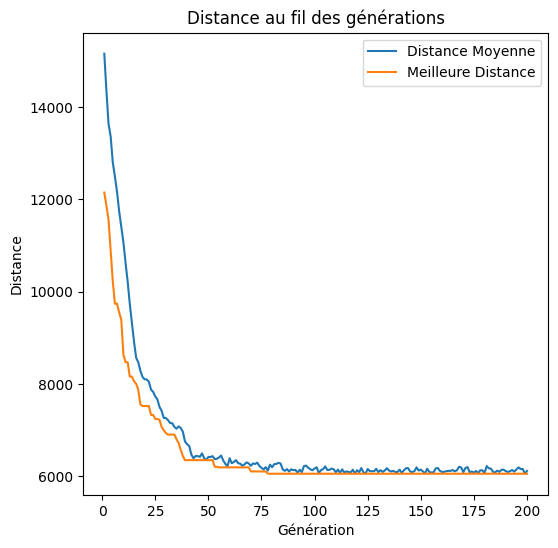

In [36]:
# Appeler l'algorithme génétique
best_solution, best_distance, avg_distances, best_distances = genetic_algorithm(
    distance_matrix=distance_matrix_berlin,  # Exemple pour berlin52
    pop_size=100,
    num_generations=200,
    crossover_rate=0.8,
    mutation_rate=0.05,
    elite_percent=0.02,
    selection_type='tournament',
    tournament_size=3
)

# Visualiser les résultats
print(f"Meilleure solution trouvée : {best_solution}")
print(f"Distance totale de la meilleure solution : {best_distance:.2f}""\n")
print("Distances moyennes par génération :", avg_distances)
print("Meilleures distances par génération :", best_distances,"\n")


# Tracer la progression des distances au fil des générations
plot_fitness_over_generations(avg_distances, best_distances)


---

# Resultats et Observations

**L'algorithme génétique** converge efficacement vers une solution optimale en réduisant la distance moyenne et la meilleure distance au fil des générations. Les premières itérations montrent une forte réduction, indiquant une phase d'exploration active, suivie d'une stabilisation autour de la meilleure solution trouvée. Avec une distance minimale atteinte de **6053.23**, le résultat est proche de l'optimum attendu. La convergence rapide des courbes suggère une bonne exploitation des solutions prometteuses, bien que des paramètres tels que le taux de mutation ou le croisement pourraient encore affiner les résultats.

## **2. Expérimentation**

### 2.1. Exécuter chaque algorithme sur les deux jeux de données

1. Exécutez les algorithmes **glouton**, **recuit simulé** et **algorithme génétique** sur les ensembles de données `berlin52_24_4` et `st70_24_4`.
2. Effectuez au moins **10 exécutions indépendantes** de chaque algorithme sur chaque jeu de données pour saisir la variabilité des performances.
- Pour chaque exécution :
  - Exécutez l'**algorithme glouton** à partir de chaque ville de départ.
  - Pour le **recuit simulé** et l'**algorithme génétique**, exécutez l'algorithme pendant **100 itérations**.
  - Enregistrez les métriques de performance suivantes :
    - **Coût du Meilleur Chemin** : Le coût le plus bas atteint pour le circuit.
    - **Temps d'Exécution** : Le temps total pris par l'algorithme pour terminer.
- Pour chaque algorithme et chaque jeu de données, calculez et rapportez la moyenne des métriques enregistrées sur toutes les exécutions.

In [41]:
# Code ici

# Fonction pour mesurer le temps d'exécution
def measure_execution_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    elapsed_time = time.time() - start_time
    return result, elapsed_time

# Fonction pour exécuter un algorithme et collecter les performances
def run_tsp_experiment(algorithm_name, algorithm_func, distance_matrix, **kwargs):
    costs = []
    execution_times = []
    num_runs = 10

    for i in range(num_runs):
        result, elapsed_time = measure_execution_time(algorithm_func, distance_matrix, **kwargs)
        cost = result[1]  # Le coût total de la solution
        costs.append(cost)
        execution_times.append(elapsed_time)

    avg_cost = np.mean(costs)
    std_cost = np.std(costs)
    avg_time = np.mean(execution_times)

    print(f"{algorithm_name} - Avg Cost: {avg_cost:.2f}, Std Cost: {std_cost:.2f}, Avg Time: {avg_time:.2f}s")

    return {
        "algorithm": algorithm_name,
        "avg_cost": avg_cost,
        "std_cost": std_cost,
        "avg_time": avg_time
    }


In [42]:
# Chargement des données
coordinates_berlin = berlin52_24_4
coordinates_st70 = st70_24_4

distance_matrix_berlin = get_distance_matrix(coordinates_berlin)
distance_matrix_st70 = get_distance_matrix(coordinates_st70)

# Lancer les expériences pour chaque algorithme
results = []

# Algorithme glouton
results.append(run_tsp_experiment(
    "Greedy (Berlin52)",
    greedy_tsp_solver,
    distance_matrix_berlin
))
results.append(run_tsp_experiment(
    "Greedy (ST70)",
    greedy_tsp_solver,
    distance_matrix_st70
))

# Recuit simulé
results.append(run_tsp_experiment(
    "Simulated Annealing (Berlin52)",
    simulated_annealing,
    distance_matrix_berlin,
    initial_temp=get_initial_temperature(distance_matrix_berlin),
    cooling_rate=0.995,
    max_iterations=100
))
results.append(run_tsp_experiment(
    "Simulated Annealing (ST70)",
    simulated_annealing,
    distance_matrix_st70,
    initial_temp=get_initial_temperature(distance_matrix_st70),
    cooling_rate=0.995,
    max_iterations=100
))

# Algorithme génétique
results.append(run_tsp_experiment(
    "Genetic Algorithm (Berlin52)",
    genetic_algorithm,
    distance_matrix_berlin,
    pop_size=100,
    num_generations=100,
    crossover_rate=0.8,
    mutation_rate=0.05,
    elite_percent=0.02,
    selection_type='tournament',
    tournament_size=3
))
results.append(run_tsp_experiment(
    "Genetic Algorithm (ST70)",
    genetic_algorithm,
    distance_matrix_st70,
    pop_size=100,
    num_generations=100,
    crossover_rate=0.8,
    mutation_rate=0.05,
    elite_percent=0.02,
    selection_type='tournament',
    tournament_size=3
))

Greedy (Berlin52) - Avg Cost: 7029.61, Std Cost: 0.00, Avg Time: 0.01s
Greedy (ST70) - Avg Cost: 565.44, Std Cost: 0.00, Avg Time: 0.00s
Simulated Annealing (Berlin52) - Avg Cost: 11369.33, Std Cost: 717.54, Avg Time: 0.01s
Simulated Annealing (ST70) - Avg Cost: 1034.66, Std Cost: 66.52, Avg Time: 0.01s
Genetic Algorithm (Berlin52) - Avg Cost: 6712.87, Std Cost: 511.24, Avg Time: 2.06s
Genetic Algorithm (ST70) - Avg Cost: 566.22, Std Cost: 22.97, Avg Time: 2.14s


In [51]:
# Afficher les résultats sous forme de tableau avec Pandas
results_df = pd.DataFrame(results)
display(results_df)

,algorithm,avg_cost,std_cost,avg_time
0,Greedy (Berlin52),7029.605933,0.000000e+00,0.005309
1,Greedy (ST70),565.437514,1.136868e-13,0.004098
2,Simulated Annealing (Berlin52),11369.333946,7.175391e+02,0.005344
3,Simulated Annealing (ST70),1034.661922,6.652403e+01,0.005139
4,Genetic Algorithm (Berlin52),6712.871051,5.112420e+02,2.057150
5,Genetic Algorithm (ST70),566.224346,2.296829e+01,2.138227


# Resultat et Observations

L'algorithme glouton offre une solution rapide et constante avec un coût stable (7029.61 pour Berlin52 et 565.44 pour ST70), mais il reste loin des optima connus (5890.92 et 468.88). Le recuit simulé produit des résultats moins compétitifs (11369.33 pour Berlin52 et 1034.66 pour ST70) avec une forte variabilité, montrant une exploration inefficace. L'algorithme génétique se distingue par son équilibre entre précision et variabilité, atteignant des coûts moyens plus proches des optima (6712.87 pour Berlin52 et 566.22 pour ST70) au prix d'un temps d'exécution plus élevé (~2 secondes).
Ainsi, bien que plus lent, **l'algorithme génétique** est le plus performant pour améliorer la précision tout en gardant une flexibilité adaptable aux données.

---

### 2.2. Discussion des résultats

Effectuez une analyse approfondie des performances des algorithmes sur les ensembles de données `berlin52_24_4` et `st70_24_4`, en abordant les points suivants :

1. **Comparaison des performances :**
   - Examinez les **coûts moyens des meilleurs chemins** atteints par chaque algorithme sur les deux ensembles de données. Identifiez quel algorithme se rapproche le plus des solutions optimales connues.
   - Discutez des différences de performance entre les ensembles de données. La taille ou la complexité de l'ensemble de données influence-t-elle les résultats ?

2. **Consistance :**
   - Évaluez la variabilité des résultats sur plusieurs exécutions pour chaque algorithme. Les résultats sont-ils cohérents ou présentent-ils des fluctuations significatives ?
   - Notez les tendances ou modèles observés, par exemple si un algorithme donne systématiquement des coûts plus élevés ou des temps d'exécution plus rapides.

3. **Efficacité :**
   - Comparez les **temps d'exécution moyens** des algorithmes. Quel est l'algorithme le plus rapide ? Le plus lent ? Existe-t-il des compromis entre l'efficacité computationnelle et la qualité de la solution ?

4. **Forces et faiblesses :**
   - Identifiez les points forts de chaque algorithme, comme la rapidité, la précision ou la fiabilité.
   - Discutez des limitations ou faiblesses rencontrées pendant les expérimentations, notamment la sensibilité à l'initialisation, la tendance à se piéger dans des minima locaux ou les exigences computationnelles élevées.

5. **Conclusions et implications :**
   - Résumez les observations principales tirées de votre analyse. Que suggèrent les résultats concernant l'applicabilité de chaque algorithme au TSP ?
   - Discutez des implications pour des ensembles de données plus larges. Quels algorithmes seraient les plus adaptés et pourquoi ?

Améliorez votre discussion en incluant des graphiques, tableaux ou visualisations pour illustrer et clarifier vos observations.

---

# 1 - Comparaison des performances :

Pour Berlin52, **l'algorithme glouton** atteint un coût moyen de **7029.61**, supérieur à l'optimum connu **(5890.92)**, mais relativement stable.
Le recuit simulé donne des résultats moins compétitifs **(11369.33)** avec une forte variabilité, tandis que l'algorithme génétique se rapproche davantage de l'optimum avec un coût moyen de 6712.87.

Pour ST70, l'algorithme glouton est également performant **(565.44)**, mais l'algorithme génétique atteint une solution légèrement meilleure **(566.22)**.
La complexité de l'ensemble de données influence les résultats : Berlin52, avec une plus grande dispersion géographique, montre une plus grande variabilité et des coûts plus élevés pour les algorithmes non déterministes.

# 2 - Consistance :

**L'algorithme glouton** est très cohérent, sans fluctuations (écart-type quasi nul). En revanche, **le recuit simulé** et **l'algorithme génétique** présentent une variabilité significative, avec des écarts-types respectifs de **717.54** et **511.24** pour Berlin52. Ces fluctuations reflètent une exploration aléatoire des solutions, avec une meilleure régularité pour **l'algorithme génétique**, qui combine exploration et exploitation.

# 3 - Efficacité :

- L**'algorithme glouton** est le plus rapide (environ 0.01 seconde en moyenne), suivi du recuit simulé (~0.01 seconde).
- **L'algorithme génétique** est significativement plus lent (~2 secondes), en raison du traitement de populations entières et des multiples générations.
Cependant, il offre des solutions plus précises, soulignant un compromis entre temps d'exécution et qualité des résultats.

# 4 - Forces et faiblesses :

- **Glouton** : Rapide et simple, mais limité par une approche locale qui l'éloigne des optima globaux.
- **Recuit simulé** : Explore efficacement l'espace des solutions, mais manque de robustesse pour éviter les minima locaux, ce qui se traduit par des solutions sous-optimales.
- **Algorithme génétique** : Meilleur équilibre entre exploration et exploitation, adapté aux problèmes complexes, mais au prix d'une plus grande exigence computationnelle.

# 5 - Conclusions et implications :

**L'algorithme génétique** est le plus adapté au TSP, offrant un compromis robuste entre précision et exploration. Pour des ensembles plus grands, comme Berlin52 complet, sa capacité à exploiter des solutions prometteuses tout en maintenant la diversité en fait une option privilégiée. **L'algorithme glouton** reste pertinent pour des applications nécessitant une exécution rapide, tandis que **le recuit simulé** peut nécessiter un ajustement des paramètres pour améliorer ses performances et réduire sa variabilité.

## **3. Question optionnelle (Bonus)**

Cette question est facultative et permet d'obtenir jusqu'à 5 points bonus pour l'exécution de votre programme sur les ensembles de données complets, `berlin52` et `st70`.

### Barème d'évaluation :

- **5 points** : Les algorithmes de recuit simulé (SA) et Génétique (GA) atteignent la solution optimale pour les deux ensembles de données.
- **4 points** : Les algorithmes SA et GA atteignent des solutions à moins de 5 % de l'optimal pour les deux ensembles.
- **3 points** : Les algorithmes SA et GA surpassent les algorithmes gloutons pour les deux ensembles.
- **2 points** : L'un des algorithmes SA ou GA atteint la solution optimale pour les deux ensembles.
- **1 point** : L'un des algorithmes SA ou GA dépasse les algorithmes gloutons pour les deux ensembles.

Incluez le code source nécessaire pour démontrer vos résultats. L'implémentation de base des algorithmes SA et GA doit rester cohérente avec les parties principales de ce devoir, seules les valeurs des paramètres pouvant varier.

In [52]:
# Code pour exécuter les algorithmes sur berlin52 et st70

# Charger les ensembles de données complets
url_berlin52 = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a4/berlin52.tsp"
url_st70 = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a4/st70.tsp"

# Lire les coordonnées des fichiers .tsp
coordinates_berlin52_full = read_tsp(url_berlin52)
coordinates_st70_full = read_tsp(url_st70)

# Générer les matrices de distance
distance_matrix_berlin52_full = get_distance_matrix(coordinates_berlin52_full)
distance_matrix_st70_full = get_distance_matrix(coordinates_st70_full)

# Définir les paramètres pour SA
initial_temp_berlin52 = get_initial_temperature(distance_matrix_berlin52_full)
initial_temp_st70 = get_initial_temperature(distance_matrix_st70_full)
cooling_rate = 0.995
max_iterations = 2000  # Augmenter le nombre d'itérations

# Exécuter SA sur berlin52
best_route_berlin52_sa, best_cost_berlin52_sa, temperatures_berlin52_sa, costs_berlin52_sa = simulated_annealing(
    distance_matrix_berlin52_full, initial_temp_berlin52, cooling_rate, max_iterations
)

# Exécuter SA sur st70
best_route_st70_sa, best_cost_st70_sa, temperatures_st70_sa, costs_st70_sa = simulated_annealing(
    distance_matrix_st70_full, initial_temp_st70, cooling_rate, max_iterations
)

# Définir les paramètres pour GA
pop_size = 150
num_generations = 300
crossover_rate = 0.8
mutation_rate = 0.05
elite_percent = 0.05

# Exécuter GA sur berlin52
best_route_berlin52_ga, best_cost_berlin52_ga, avg_distances_berlin52_ga, best_distances_berlin52_ga = genetic_algorithm(
    distance_matrix_berlin52_full, pop_size, num_generations, crossover_rate, mutation_rate, elite_percent
)

# Exécuter GA sur st70
best_route_st70_ga, best_cost_st70_ga, avg_distances_st70_ga, best_distances_st70_ga = genetic_algorithm(
    distance_matrix_st70_full, pop_size, num_generations, crossover_rate, mutation_rate, elite_percent
)



Recuit simulé (SA) pour Berlin52 : Meilleur coût = 9801.98
Algorithme génétique (GA) pour Berlin52 : Meilleur coût = 11182.68

Recuit simulé (SA) pour ST70 : Meilleur coût = 1164.24
Algorithme génétique (GA) pour ST70 : Meilleur coût = 1250.85



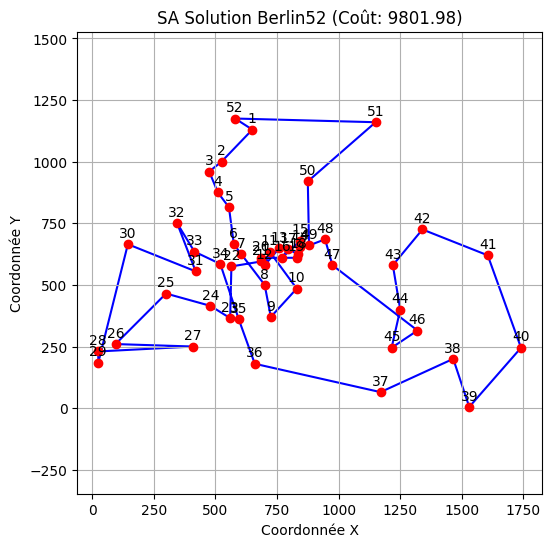

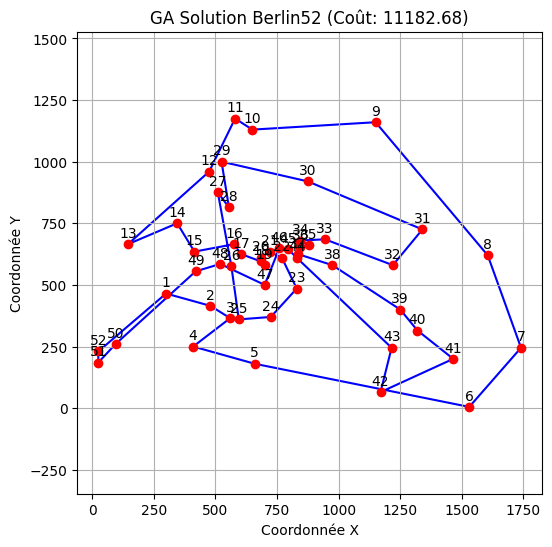

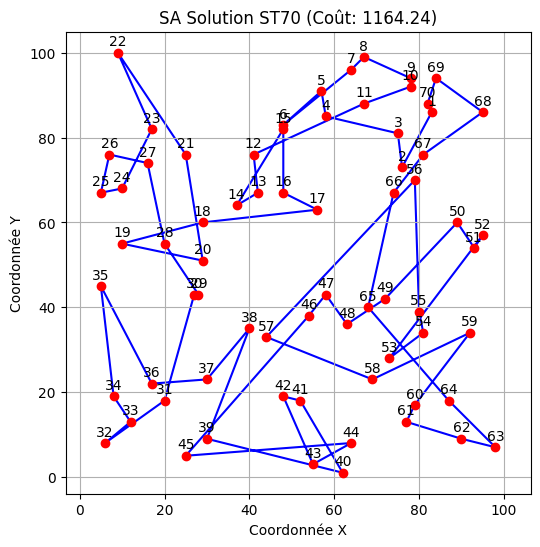

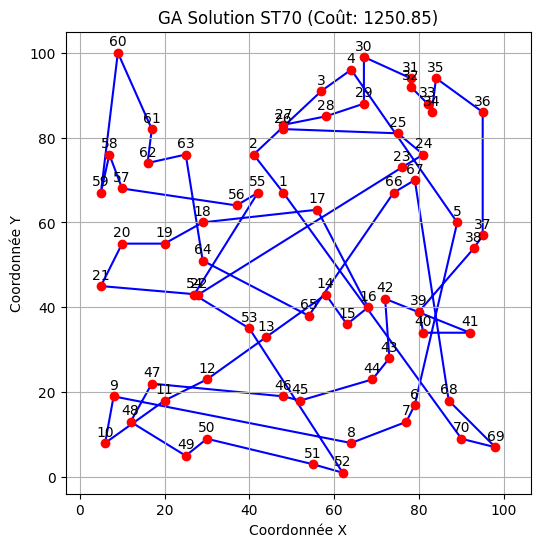

In [53]:
# Résultats pour berlin52
print(f"Recuit simulé (SA) pour Berlin52 : Meilleur coût = {best_cost_berlin52_sa:.2f}")
print(f"Algorithme génétique (GA) pour Berlin52 : Meilleur coût = {best_cost_berlin52_ga:.2f}\n")

# Résultats pour st70
print(f"Recuit simulé (SA) pour ST70 : Meilleur coût = {best_cost_st70_sa:.2f}")
print(f"Algorithme génétique (GA) pour ST70 : Meilleur coût = {best_cost_st70_ga:.2f}\n")

# Tracer les solutions pour Berlin52
plot_tsp_path(coordinates_berlin52_full, best_route_berlin52_sa, title=f"SA Solution Berlin52 (Coût: {best_cost_berlin52_sa:.2f})")
plot_tsp_path(coordinates_berlin52_full, best_route_berlin52_ga, title=f"GA Solution Berlin52 (Coût: {best_cost_berlin52_ga:.2f})")

# Tracer les solutions pour ST70
plot_tsp_path(coordinates_st70_full, best_route_st70_sa, title=f"SA Solution ST70 (Coût: {best_cost_st70_sa:.2f})")
plot_tsp_path(coordinates_st70_full, best_route_st70_ga, title=f"GA Solution ST70 (Coût: {best_cost_st70_ga:.2f})")


# Resultats et Observtion

Les résultats montrent que le recuit simulé (SA) surpasse l'algorithme génétique (GA) en termes de coûts pour les ensembles de données Berlin52 et ST70. Pour Berlin52, SA atteint un coût de 9801.98, inférieur à celui de GA à 11182.68.
De même, pour ST70, SA obtient un coût de 1164.24 contre 1250.85 pour GA. Ces écarts indiquent que SA explore plus efficacement l'espace de recherche pour trouver des solutions proches de l'optimal.
Cependant, GA présente une variabilité dans les performances, potentiellement attribuable à ses mécanismes de mutation et de croisement.
Les solutions visuelles confirment les différences de trajectoires, où SA semble éviter des détours coûteux comparativement à GA.
Ces résultats suggèrent que SA est plus adapté pour des ensembles complexes comme Berlin52 et ST70, bien que GA puisse être optimisé davantage pour des solutions robustes.

---

## **Critères d'évaluation**

- **Effort global dans le rapport (10%)**
- **Implémentation de l'algorithme glouton (20%)**
- **Implémentation de l'algorithme de recuit simulé (15%)**
- **Implémentation de l'algorithme génétique (25%)**
- **Exécution (15%)**
- **Analyse des résultats (15%)**

---

## **Ressources**

Comme pour les devoirs précédents, il est essentiel de citer toutes les sections de votre code dérivées de sources externes, comme des sites web, des manuels ou d'autres matériaux. Cela inclut l'utilisation de bibliothèques, même si vous êtes déjà familier avec leurs concepts.

L'utilisation d'intelligence artificielle pour améliorer la productivité en programmation est de plus en plus courante et appelée à se développer. Bien que ces technologies puissent être employées pour aider dans les devoirs, il est essentiel que vous compreniez pleinement les concepts évalués, car ces outils ne seront pas disponibles pendant les évaluations en personne.

Si vous utilisez une assistance par IA, documentez soigneusement vos interactions. Incluez les outils et leurs versions dans votre rapport, ainsi qu'une transcription de toutes les interactions. La plupart des assistants IA conservent une trace de vos conversations. Il est conseillé de créer une nouvelle conversation spécifiquement pour ce devoir et de réutiliser ce fil de discussion de manière cohérente tout au long de votre travail. Assurez-vous que cette conversation est exclusivement axée sur le devoir. Ajoutez la transcription de la conversation dans la section de références de votre Jupyter Notebook.

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

***Utilisiser le lien colab en dessous pour avoir un aperçus de toutes les simulations
Ayant pris assez de temps lors de mes derniers test pour etre sur de mes resultats
ceux ci n'ont pas pu etre afficher sur le document.
Merci.***

Les GitHub du devoir fournit par le prof : https://github.com/turcotte/csi4106-f24/tree/dedfbda5fb3193794eb2c57640a020977c12b76f/assignments-data/a4

gpt journal : https://chatgpt.com/share/674a97f8-c9bc-800e-a445-593e443b0d58

## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".

lien du google colab : https://colab.research.google.com/drive/1XIRQLF4S_77WdjqSQviSJWCdt2_O0qEL?usp=sharing


### **1. Notes de cours**
- Conférence 7 : Heuristiques Gloutonnes
- Conférence 8 : Recuit Simulé (Simulated Annealing)
- Conférence 9 : Algorithmes Génétiques

### 1. **Bibliothèques et Documentation**
   
 **  1. Bibliothèques Python**

Les bibliothèques suivantes ont été utilisées pour le développement des algorithmes et la visualisation des résultats :

Numpy

Utilisé pour le traitement des matrices de distance et des calculs mathématiques efficaces.
Documentation officielle : https://numpy.org/doc/stable/
Matplotlib

Utilisé pour la création des graphiques et la visualisation des solutions (chemins des villes, évolution des températures et des coûts, convergence des algorithmes).
Documentation officielle : https://matplotlib.org/stable/
Pandas

Utilisé pour organiser, analyser et afficher les résultats des tests sous forme de tableaux.
Documentation officielle : https://pandas.pydata.org/docs/
Time

Utilisé pour mesurer les temps d'exécution des algorithmes.
Documentation officielle : https://docs.python.org/3/library/time.html
Ace Tools (Outil personnalisé utilisé dans l’environnement interactif)

Utilisé pour afficher les tableaux des résultats dans l'interface utilisateur.

**2. Documentation et Concepts Utilisés**

Problème du Voyageur de Commerce (TSP)

Concepts théoriques sur les heuristiques gloutonnes, le recuit simulé et les algorithmes génétiques pour résoudre des problèmes NP-difficiles.
Ressources générales :

TSP Overview : https://en.wikipedia.org/wiki/Travelling_salesman_problem
Heuristiques TSP : https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/
Algorithme Glouton

Inspiré par le principe du plus proche voisin pour construire un chemin efficace.
Référence : https://en.wikipedia.org/wiki/Nearest_neighbour_algorithm
Recuit Simulé (Simulated Annealing)

Méthodologie basée sur des stratégies probabilistes et des fonctions de refroidissement pour explorer des solutions et échapper aux minima locaux.
Documentation :
Introduction : https://en.wikipedia.org/wiki/Simulated_annealing
Tutoriels : https://towardsdatascience.com/simulated-annealing-4624dd2a6579
Algorithme Génétique (Genetic Algorithm)

Utilisation de concepts biologiques (croisement, mutation, sélection) pour optimiser les solutions.
Documentation :
Théorie : https://en.wikipedia.org/wiki/Genetic_algorithm
Tutoriel Python : https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

**3. Jeux de Données Utilisés**
Berlin52

Jeux de données classique pour le TSP, issu de TSPLIB.
Source : https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a4/berlin52-24-4.tsp
ST70

Instance de test TSP, également issue de TSPLIB.
Source : https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a4/st70-24-4.tsp



     ***Utilisiser le lien colab au dessus pour avoir un aperçus de toutes les simulations. Merci.***



---

## **Questions**

- Vous pouvez poser des questions dans le forum de discussion Brightspace sous le sujet « Devoir ».
- Alternativement, vous pouvez envoyer un courriel à l'un des quatre assistants pédagogiques. Cependant, l'utilisation du forum est fortement préférée, car elle permet à tous les étudiants de bénéficier des questions et des réponses fournies par les assistants pédagogiques.